## Question 2

### Data pre-prosessing Task 1

In [1]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import the dataset
df = pd.read_csv("ECA_data.csv")

In [3]:
#Check that the data is imported correctly
df

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,1,210000,0.000,235822,1,1,1.0,2.0,30,0,...,0,0,0,0,0,0,0,0,0,0
1,2,260000,10928.050,278481,0,0,2.0,2.0,31,0,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,3,400000,65397.850,431993,0,0,3.0,1.0,51,0,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,4,20000,3695.300,22368,0,0,2.0,1.0,58,-1,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,5,180000,68.250,166900,0,1,2.0,1.0,42,0,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18764,18762,220000,33065.900,225862,0,0,3.0,1.0,39,0,...,192815,208365,88004,31237,15980,20000,5003,3047,5000,1000
18765,18763,150000,294.525,149966,0,0,3.0,2.0,43,-1,...,1828,3502,8979,5190,0,3526,8998,129,0,0
18766,18764,30000,623.875,30327,1,0,2.0,2.0,37,3,...,3356,2758,20878,20582,19357,0,22000,4200,2000,3100
18767,18765,80000,0.000,94607,1,0,3.0,1.0,41,-1,...,78379,76304,52774,11855,48944,3409,1178,1926,52964,1804


There are 18769 rows but the unique customer ID ends at 18766 so there might be 3 duplicated customer ID and information.

In [4]:
#Check for duplicates
print('Number of rows of duplicated dataset: ', df.duplicated().sum())

Number of rows of duplicated dataset:  3


In [5]:
#Visualize the duplicated observations
df[df.duplicated()]

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
132,132,200000,1270.675,188181,0,1,2.0,1.0,40,-1,...,32333,12610,7850,977,9205,13587,7850,0,9205,0
379,378,240000,39804.975,256476,0,1,2.0,2.0,35,0,...,232729,223431,226361,223508,238587,10000,8000,9000,19000,9000
422,420,30000,1883.700,32877,1,1,1.0,2.0,23,2,...,10454,11862,12104,12351,8000,2000,242,247,2000,0


In [6]:
#Removing 3 rows of duplicated customer information
df.drop_duplicates((['ID']), inplace = True)

#Check shape of dataset to confirm removal of 3 rows
df.shape

(18766, 24)

### Data pre-prosessing Task 2

In [7]:
#Check for missing/null values in the dataset 
df.isnull().sum()

ID            0
LIMIT         0
BALANCE       0
INCOME        0
RATING        0
GENDER        0
EDUCATION    13
MARITAL      38
AGE           0
S1            0
S2            0
S3            0
S4            0
S5            0
B1            0
B2            0
B3            0
B4            0
B5            0
R1            0
R2            0
R3            0
R4            0
R5            0
dtype: int64

In [8]:
#Visualize the null observations in EDUCATION
df[df['EDUCATION'].isnull()]

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
3400,3398,350000,891.625,344631,0,1,NaN,2.0,53,-1,...,4815,61044,22611,1385,6043,61349,22687,1389,6058,1153
3876,3874,210000,448.525,211085,0,0,NaN,2.0,45,0,...,5854,1032,788,3499,3372,1032,788,3565,3372,15381
5650,5648,100000,1337.350,95891,0,0,NaN,2.0,37,0,...,0,0,0,0,0,0,0,0,0,0
5665,5663,200000,0.000,187245,0,0,NaN,2.0,40,0,...,0,200,1000,0,0,200,1000,0,0,0
6183,6181,230000,1468.950,232051,0,1,NaN,2.0,47,-1,...,5743,1336,255,5425,4838,1598,0,5425,4838,3840
8689,8687,50000,7831.075,58331,0,1,NaN,1.0,40,0,...,46229,46798,47647,40500,41921,2298,2100,2500,1921,8432
8799,8797,200000,3003.000,201126,0,1,NaN,2.0,30,-1,...,7289,2868,9470,5816,7809,0,9470,5834,7809,2886
9431,9429,130000,4194.750,143669,0,0,NaN,NaN,42,0,...,23181,18912,19960,81985,80189,1700,2000,63000,2885,3000
11253,11251,200000,2557.975,209352,0,1,NaN,NaN,46,-1,...,1261,8187,1261,1261,1261,8187,1261,1261,1261,1261
12003,12001,220000,0.000,255282,0,1,NaN,1.0,35,0,...,319,10567,319,319,319,10567,319,319,319,2420


In [9]:
#Visualize the null observations in MARITAL
df[df['MARITAL'].isnull()]

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
521,519,290000,9195.725,294806,0,1,2.0,NaN,49,0,...,53829,53841,54486,55198,55878,1926,1931,1989,2002,2028
694,692,140000,13279.525,151880,0,0,3.0,NaN,47,0,...,67073,57233,52295,49047,38796,5017,10012,10013,3010,6015
819,817,80000,1237.250,74355,0,1,3.0,NaN,37,0,...,3087,5210,3882,4785,1000,5215,3882,4785,1968,0
847,845,30000,3525.025,20346,0,1,3.0,NaN,46,2,...,19532,22194,21542,24022,25473,3000,0,3000,2000,0
1501,1499,70000,2861.950,56633,0,1,3.0,NaN,34,2,...,17295,16720,18438,18004,19546,0,2000,0,2000,0
2594,2592,120000,578.725,143627,0,1,3.0,NaN,41,0,...,0,0,0,1344,881,0,0,1344,929,599
5350,5348,20000,315.000,23066,0,0,3.0,NaN,29,4,...,1800,1800,1800,1800,1800,0,0,0,0,0
6054,6052,120000,275.800,121925,0,1,3.0,NaN,47,0,...,3009,0,0,430,1520,0,0,430,1520,730
6298,6296,80000,12243.700,80169,0,1,3.0,NaN,41,0,...,52041,39864,38934,38816,38850,2500,2200,2000,2000,2000
6345,6343,110000,15742.125,103703,0,1,3.0,NaN,31,0,...,89989,84229,79288,73315,63818,4000,5000,3000,3000,3000


There are 13 missing values in the EDUCATION column and 38 in the MARITAL column, total 51 missing values. There are also 2 rows with missing values in both the EDUCATION and MARITAL column

In [10]:
#Dropping the rows with missing values
df.dropna(inplace = True)

#Check shape of dataset to confirm removal of 49 rows
df.shape

(18717, 24)

### Data pre-prosessing Task 3

In [11]:
#Check the domain of the columns to identify invalid values 

for col in df:

    print(df[col].value_counts())
    
    print('\n')

1        1
12501    1
12517    1
12516    1
12515    1
        ..
6252     1
6251     1
6250     1
6249     1
18766    1
Name: ID, Length: 18717, dtype: int64


50000     2019
20000     1245
30000      998
80000      973
200000     965
          ... 
327680       1
690000       1
760000       1
750000       1
16000        1
Name: LIMIT, Length: 80, dtype: int64


0.000        1571
68.250        156
437.500        42
57.050         38
136.500        38
             ... 
12973.800       1
12970.475       1
15951.600       1
8965.075        1
8387.575        1
Name: BALANCE, Length: 14834, dtype: int64


10000     603
54599       3
57275       3
111725      3
55096       3
         ... 
123748      1
120028      1
339955      1
484556      1
40267       1
Name: INCOME, Length: 17656, dtype: int64


0    14607
1     4110
Name: RATING, dtype: int64


1    11567
0     7150
Name: GENDER, dtype: int64


2.0    8866
1.0    6408
3.0    3109
0.0     334
Name: EDUCATION, dtype: int64


2.0    9825

We discover that there are 5 customers who are -1 years old and 5 who are 199 years old, which is impossible. 

In [12]:
#Check if there are any more error values in age
print( 'Number of customers with age lower than 1: ' , len(df[df['AGE'] < 1]) )
print( 'Number of customers with age higher than 100: ' , len(df[df['AGE'] > 100]) )

Number of customers with age lower than 1:  5
Number of customers with age higher than 100:  5


In [13]:
#Remove the data of these 10 customers
df = df[(df['AGE']> 0 ) & (df['AGE']<100)]

#Check dataset to confirm removal of 10 rows
df.shape

(18707, 24)

### Data pre-prosessing Task 4

In [14]:
#Identify if any data types need to be modified
df.dtypes

ID             int64
LIMIT          int64
BALANCE      float64
INCOME         int64
RATING         int64
GENDER         int64
EDUCATION    float64
MARITAL      float64
AGE            int64
S1             int64
S2             int64
S3             int64
S4             int64
S5             int64
B1             int64
B2             int64
B3             int64
B4             int64
B5             int64
R1             int64
R2             int64
R3            object
R4             int64
R5             int64
dtype: object

As the values of R3 are identified as objects, we need to convert them into integers.

In [15]:
#By running this code, we discover that some R3 values have '$' in them through the error received
#[int(element) for element in df.loc[:, 'R3']]

In [16]:
#Finding the values of R3 that have '$' and ',' in them
filt = df['R3'].str.startswith('$')
df.loc[filt, 'R3']

1800         $0
1801     $2,620
1802     $6,000
1803     $2,200
1804       $390
1805     $2,688
1806    $13,069
1807     $7,000
1808     $5,000
1809     $2,089
Name: R3, dtype: object

In [17]:
#Removing the '$' from R3
df['R3'] = df['R3'].str.replace('$', '',)

#Removing the ',' from R3
df['R3'] = df['R3'].str.replace(',', '',)

#Rhanging R3 from object to integer
df['R3'] = df['R3'].astype(int)

C:\Users\hangs\AppData\Local\Temp\ipykernel_5324\168944903.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['R3'] = df['R3'].str.replace('$', '',)
C:\Users\hangs\AppData\Local\Temp\ipykernel_5324\168944903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['R3'] = df['R3'].str.replace('$', '',)
C:\Users\hangs\AppData\Local\Temp\ipykernel_5324\168944903.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [18]:
#Check that R3 is converted to integer
df.dtypes

ID             int64
LIMIT          int64
BALANCE      float64
INCOME         int64
RATING         int64
GENDER         int64
EDUCATION    float64
MARITAL      float64
AGE            int64
S1             int64
S2             int64
S3             int64
S4             int64
S5             int64
B1             int64
B2             int64
B3             int64
B4             int64
B5             int64
R1             int64
R2             int64
R3             int32
R4             int64
R5             int64
dtype: object

## Question 3

In [19]:
#Map 'GENDER' values
Gender_Full = df['GENDER'].map({0:'Male', 1:'Female'})

#Map 'EDUCATION' values
Education_Full = df['EDUCATION'].map({0:'Others', 1:'Postgraduate', 2:'Tertiary', 3:'High School'})

#Map 'MARITAL' values
Marital_Full = df['MARITAL'].map({0:'Others', 1:'Single', 2:'Married'})

#Map 'RATING' values
Rating_Full = df['RATING'].map({0:'Good', 1:'Bad'})

In [20]:
#Increase the size for all plots
sns.set(rc={'figure.figsize':(12,10)})

### Insight and Plot 1: 
Investigate the distribution of age and finding the mean age.

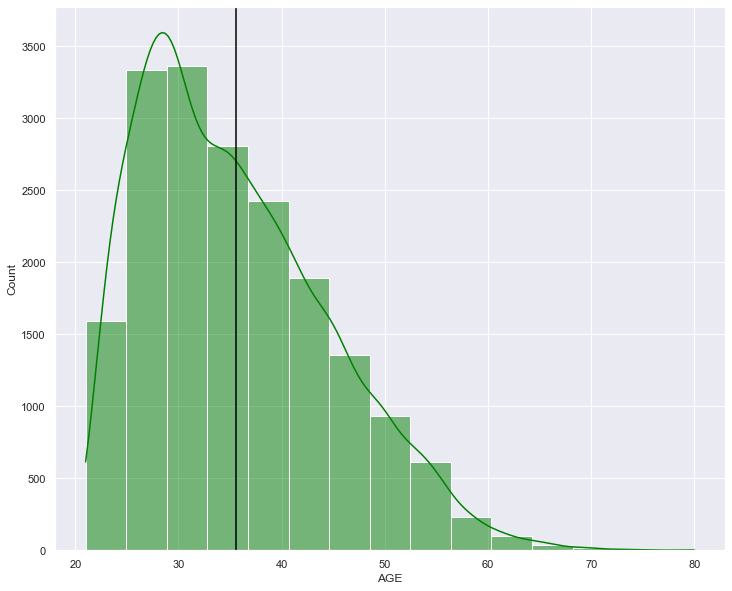

In [21]:
#Calculating the mean age
mean_age = df['AGE'].mean()

#Plotting the histogram
#Age by count with distribution line, set bin at 15
sns.histplot(df['AGE'], kde=True, bins=15, color='green')

#Plotting the mean
plt.axvline(mean_age,0,1, color='blacK')

Customer ages are normally distributed and skewed to the right with a mean age of 35.5 years old.

### Insight and Plot 2:
Investigate relationship between customer education level and income for different genders.

<AxesSubplot:xlabel='EDUCATION', ylabel='INCOME'>

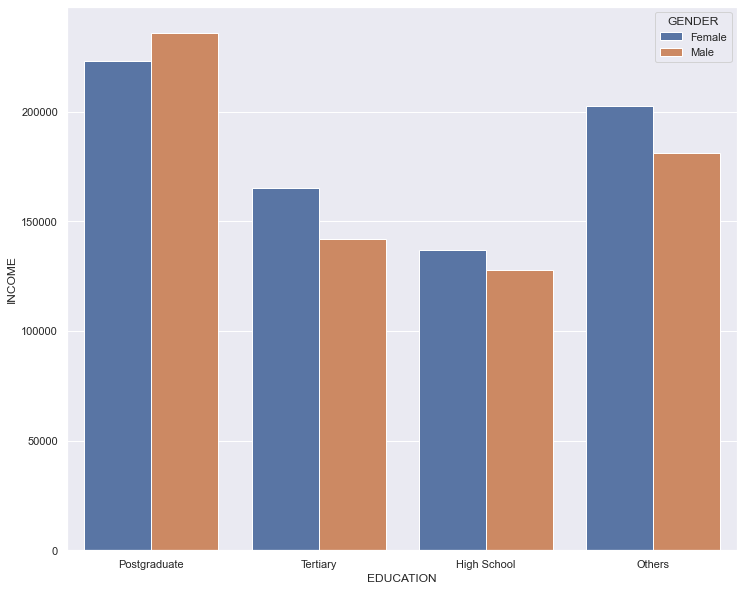

In [22]:
#Plotting the bar graph
#x-axis is education, y-axis is income, gender as categories, remove confidence interval
sns.barplot(data=df, x=Education_Full, y='INCOME', hue=Gender_Full, ci=False, estimator=np.mean)     

On average, based on highest level of education attained, postgraduate customers have the highest income followed by others, tertiary and lastly high school. Also, except for postgraduates, female customers earn a higher income than male customers for all other education levels.

### Insight and Plot 3:
Investigate relationship between customer marital status and credit limit for different customer ratings.

<AxesSubplot:xlabel='LIMIT', ylabel='MARITAL'>

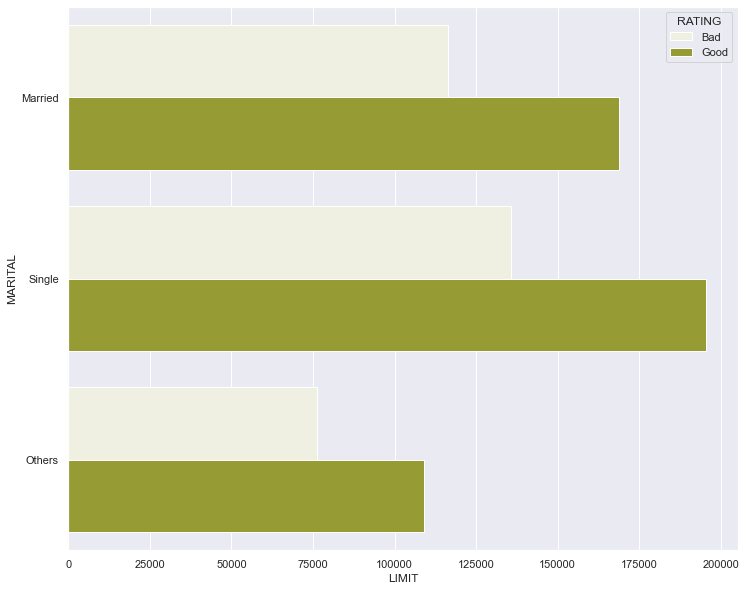

In [23]:
#Plotting the bar graph
#x-axis is limit, y-axis is marital, rating as categories, remove confidence interval, horizontal orientation, change color
sns.barplot(data=df, x='LIMIT', y=Marital_Full, hue=Rating_Full, ci=False, orient = 'h', color='#A6AC22', estimator=np.mean)

On average, customers who are single have the highest total credit limit followed by married and lastly other customers. Also, for all different marital status, customers with good rating have higher total credit limits.

### Insight and Plot 4:
Investigate relationship between customer marital status and current credit balance for different genders.

<AxesSubplot:xlabel='MARITAL', ylabel='BALANCE'>

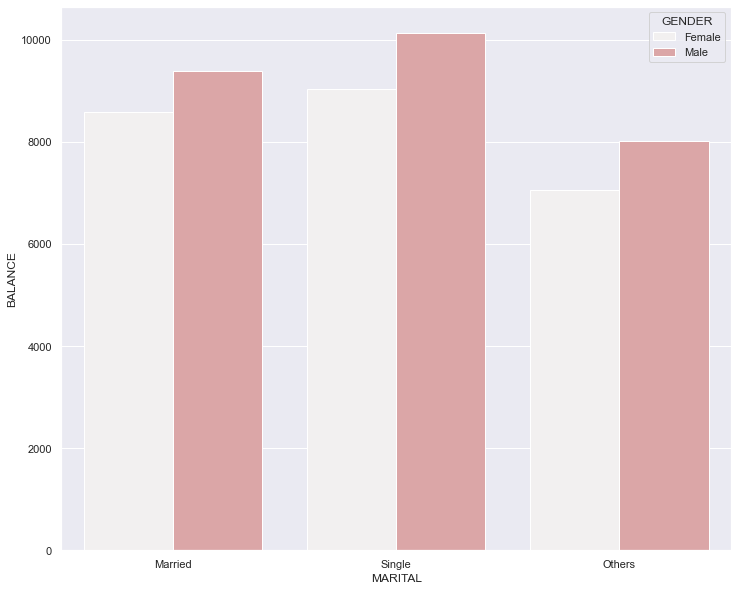

In [24]:
#Plotting the bar graph
#x-axis is marital, y-axis is balance, gender as categories, remove confidence interval, change color 
sns.barplot(data=df, x=Marital_Full, y='BALANCE', hue=Gender_Full, ci=False, color='#E49D9F', estimator=np.mean)

On average, customers who are single have the highest current credit balance followed by those married and others with the lowest. Additionally, regardless of marital status, male customers have higher current credit balances on average.

### Insight and Plot 5:
Investigate the relationship between customer income and credit limit

<AxesSubplot:xlabel='INCOME', ylabel='LIMIT'>

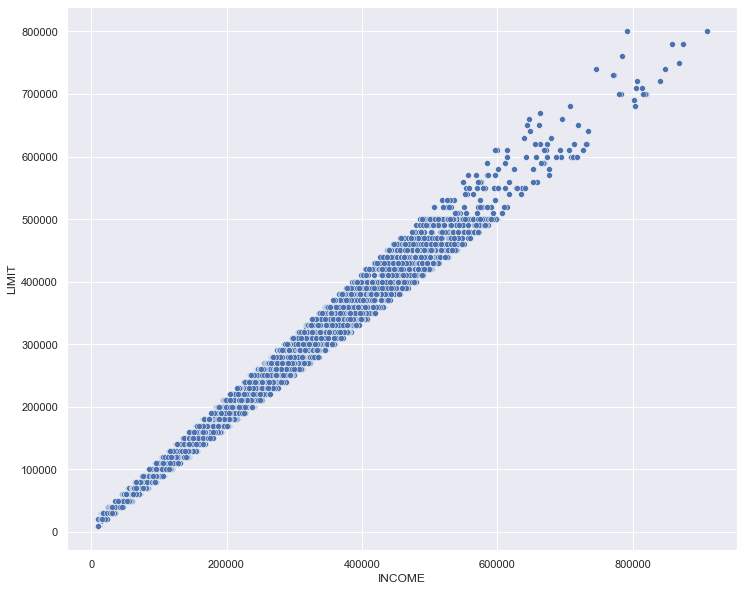

In [25]:
#Plotting the scatter graph
#x-axis is income, y-axis is limit 
sns.scatterplot(data=df, x='INCOME', y='LIMIT', estimator=np.mean)

Customer credit limit and income are highly positively correlated where limit increases as income increases.

## Question 4

In [26]:
#Import more relevant libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn import preprocessing
from math import sqrt

### Further data pre-processing

#### 1. Feature selection
As there are many variables, we select the ones we want to fit into the model to reduce machine computation required.

To select the more important features, we run a correlation to identify which variables are more correlated to our target variable B1.

<AxesSubplot:>

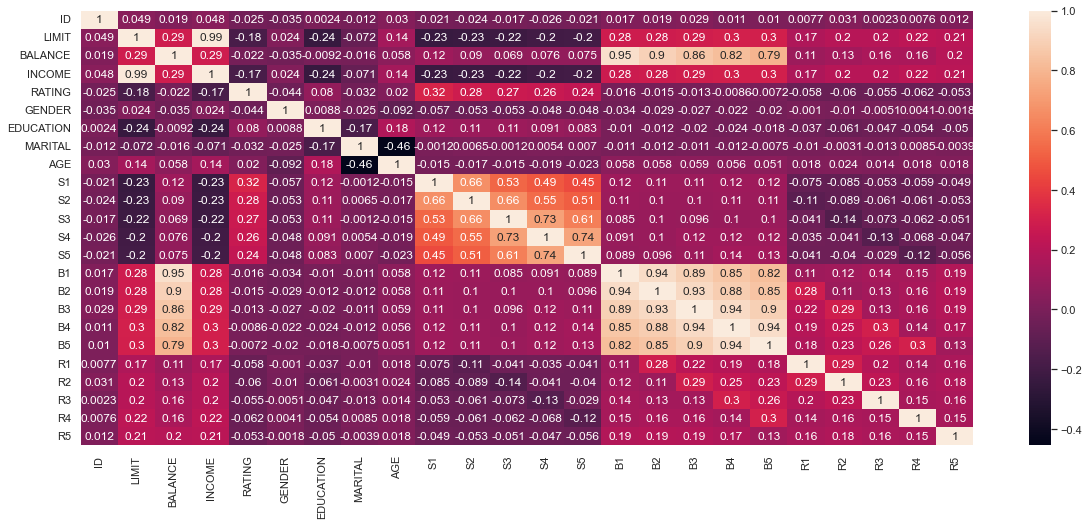

In [27]:
#Change heatmap size
fig , ax = plt.subplots(figsize = (20,8))

#Visualising correlation with heatmap 
sns.heatmap(df.corr(), annot=True)

Variables with correlation coefficient to B1 that are closer to 1 or -1 signifies a stronger correlation. This means that B1 is more likely to increase or decrease when values of these variables change. 

Thus, the independent variables with highest correlation that we want are: Balance, B1, B2, B3, B4 & B5 

In [28]:
#Dropping the other columns that are not useful
df_new = df.drop(['ID', 'LIMIT', 'INCOME', 'RATING', 'GENDER', 'EDUCATION', 'MARITAL', 'AGE', 'S1', 'S2', 'S3', 'S4', 'S5', 'R1', 'R2', 'R3', 'R4', 'R5'], axis = 1)

#Visualising the new dataframe
df_new.head()

,BALANCE,B1,B2,B3,B4,B5
0,0.00,0,0,0,0,0
1,10928.05,54074,46407,38874,31324,24031
2,65397.85,343591,352484,338823,283288,185288
3,3695.30,21470,200,0,28740,1295
4,68.25,1260,598,2056,4300,1802


#### 2. Standardisation 

Variables with wider range of values will likely have greater impact in the regression model than variables with smaller range values, therefore needing to be scaled down. 

Thus, we standardise the data using Standard Scaler to make values in range so no columns will over predict.

In [29]:
#Saving independent variables as X
X = df_new.drop('B1', axis = 1)

#Saving dependent target variable as y
y = df_new[['B1']]

#Saving Standard Scaler used to standardise our variables
x_scaler = StandardScaler()
y_scaler = StandardScaler()

In [30]:
#Standardising the independent variables
x_scaler.fit(X)
X_stn = pd.DataFrame(x_scaler.transform(X), columns = X.columns) 

#Standardising the dependent variable
y_scaler.fit(y)
y_stn = pd.DataFrame(y_scaler.transform(y), columns = ['B1'])

### Splitting the Raw Data

Data has to be split into training and testing dataset. Training dataset is used to construct the model while testing dataset is for evaluating the model's accuracy of predicting unseen data.  

In [31]:
#Divide into training and testing data with proportion of 70:30
X_train , X_test , y_train , y_test = train_test_split(X_stn, y_stn, train_size=0.70, test_size=0.30, random_state=20)

#Visualise shape of training and testing datas
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13094, 5)
(5613, 5)
(13094, 1)
(5613, 1)


### Running the Linear Regression

In [32]:
#lm:linear model, insert intercept used for prediction 
lm = LinearRegression(fit_intercept = True)

#Fit training data into lm
lm.fit(X_train, y_train)

#Calculate predicted y values
y_pred = lm.predict(X_train)

### Evaluating the Linear Regression Model
#### 1. Determine model accuracy 
- For training dataset: calculate R Square using 2 methods where both will return the same result.
- For testing dataset: calculate R Square using the score function only.

In [33]:
#Model Accuracy on training dataset

#Method 1 using the function: score
print('The Accuracy on the training dataset is: ', lm.score(X_train, y_train))
#Method 2 using the function: r2_score
print('The Accuracy using method 2 on the training dataset is: ', r2_score(y_train,y_pred))   

print("")
#Model Accuracy on testing dataset
print('The Accuracy on the testing dataset is: ', lm.score(X_test, y_test))

The Accuracy on the training dataset is:  0.9414104617520799
The Accuracy using method 2 on the training dataset is:  0.9414104617520799

The Accuracy on the testing dataset is:  0.9380816877709176


Explanation:
- R Square is a measure of how close the data are to the fitted regression line.
- The accuracy score represents the coefficient of determination (R^2) which is 1 at maximum and can be negative.
- In this case, our model explains 94.1% of the training data and 93.8% of the testing data.

#### 2. Root Mean Squared Error (RMSE)

In [34]:
#Calculating RMSE for both training and testing dataset using the fucntion: mean_squared_error
print('The RMSE on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred)))
print('The RMSE on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm.predict(X_test))))

The RMSE on the training dataset is:  0.24083404019301868
The RMSE on the testing dataset is:  0.251727745884312


Explanation:
- RMSE is the standard deviation of the residuals where residuals refer to the difference between the predicted values and the regression line.
- Thus, RMSE is a measure of how spread the residuals are where the lower the value the better.

#### 3. Mean Absolute Error (MAE)

In [35]:
#Calculating MAE using the function: mean_absolute_error
print('The MAE on the training dataset is: ',mean_absolute_error(y_train,y_pred))
print('The MAE on the testing dataset is: ',mean_absolute_error(y_test,lm.predict(X_test)))

The MAE on the training dataset is:  0.09005864020525482
The MAE on the testing dataset is:  0.09348893149506347


Explanation:
- MAE is the average of all the absolute errors where absolute errors are the differences between the true value (y_train) and the predicted value (y_pred).
- The lower the MAE the better.

#### 4. Calculating the Coefficients
- The weights of the independent variables.

In [36]:
#Calculating Coefficients
print('Coefficients: ', lm.coef_ )

Coefficients:  [[5.49558671e-01 3.66116583e-01 4.85434827e-02 9.32289694e-05
  3.59337445e-02]]


#### 5. Calculating the Intercept
- The expected mean value of Y when all X=0

In [37]:
#Calculating Intercept
print('Intercept: ', lm.intercept_)

Intercept:  [-0.00083561]


#### 6. Plotting the Model of Actual values vs Predicted values
- Visualise how well our predictions are

C:\Users\hangs\AppData\Local\Temp\ipykernel_5324\2541746002.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)


Text(0.5, 1.0, 'Actuals Vs Predicted Values')

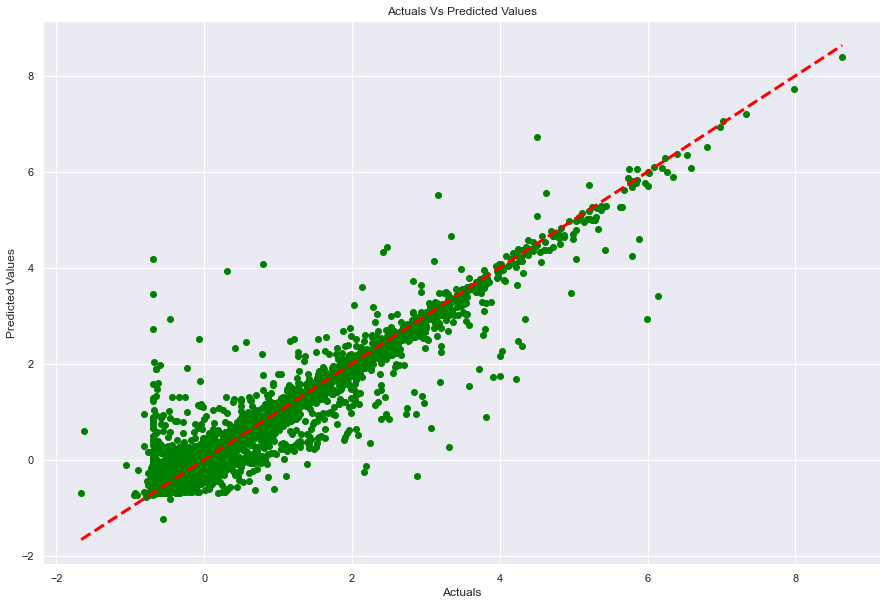

In [38]:
#Increasing figure size
plt.figure(figsize=(15,10))

#Plotting Actuals vs Predicted
plt.scatter(y_train, y_pred, c='green')

#Perfect line used to inteprete the results, not the regression line
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)

#X-axis label
plt.xlabel('Actuals')

#Y-axis label
plt.ylabel('Predicted Values')

#Title
plt.title('Actuals Vs Predicted Values')

Explanation:
- The red line represents an assumption that our predicted values are 100% correct. 
- The closer the data points are to the red line, the closer the predictions are.
- The further away the data points are to the red line, the further the predictions are.

#### 7. Plotting Residuals

C:\Users\hangs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actuals Vs Residuals')

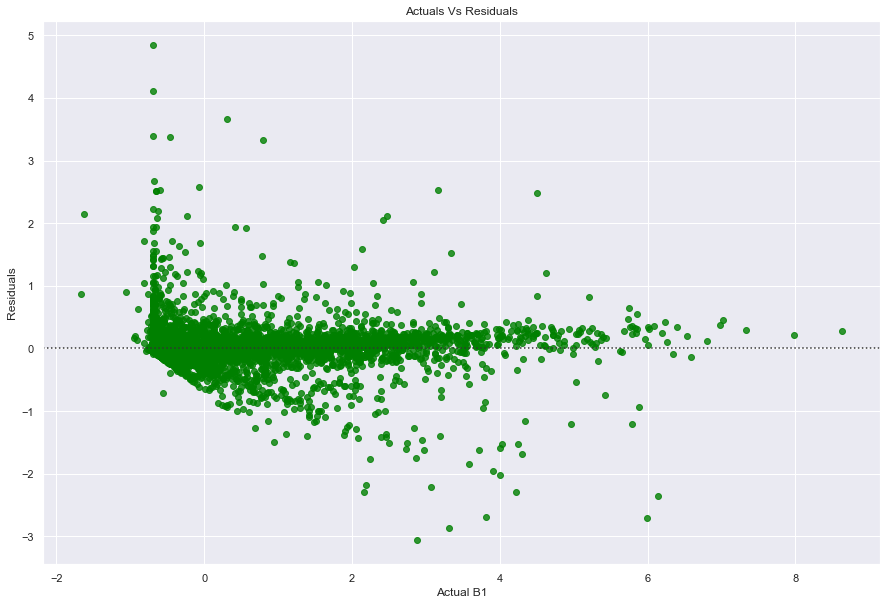

In [39]:
#Increasing figure size
plt.figure(figsize=(15,10))

#Plotting residuals
sns.residplot(y_train, y_pred, color='green')

#X-axis label
plt.xlabel('Actual B1')

#Y-axis label
plt.ylabel('Residuals')

#Title
plt.title('Actuals Vs Residuals')

#### Explanation:
- The closer the data points are to the dotted line, the closer the predictions are.
- The further away the data points are to the dotted line, the further the predictions are.

### Using the Linear Regression Model to Make Predictions

To test the accuracy of the predictions, we use 2 methods to compare the predicted value with the actual value.

In [40]:
#Testing prediction accuracy method 1
pred1 = y_scaler.inverse_transform(lm.predict(x_scaler.transform(X.loc[[2], :])))
print('The predicted B1 is: ', pred1)

#Testing prediction accuracy method 2
pred1 = y_scaler.inverse_transform(lm.predict(x_scaler.transform([[65397.85, 352484, 338823, 283288, 185288]])))
print('The predicted B1 is: ', pred1)

The predicted B1 is:  [[356227.10424303]]
The predicted B1 is:  [[356227.10424303]]


C:\Users\hangs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\hangs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\hangs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In this case, referring to actual values from the dataset, the actual B1 is 343591 while the predicted value is 356227, which is quite close meaning the model is fairly accurate.

#### Making an Actual Prediction

In [41]:
#Random values for the independent variables 

#BALANCE = 70584
#B2 = 41658
#B3 = 39276
#B4 = 27454
#B5 = 19781

#Prediction Calculator
pred1 = y_scaler.inverse_transform(lm.predict(x_scaler.transform([[70584, 41658, 39276, 27454, 19781]])))
print('The predicted B1 is: ', pred1)

The predicted B1 is:  [[232548.30249674]]


C:\Users\hangs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\hangs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
